# NYSE Data
This nootbook is to look at the NYSE data.

In [14]:
import data_utils
import pandas
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
import numpy as np

loading from csv

In [2]:
nyse_data = data_utils.load_data("split-prices.csv")
nyse_data["date"] = pandas.to_datetime(nyse_data["date"])

Loading data from data/split-prices.csv


Printing out the data to get a feel of the types and fields.

looking the stats

In [3]:
nyse_data.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


# Plotting Functions and Data Functions
These are util functions. 

- [ ] to be moved to a .py file and the functions of the form foo(df...,) can be methods for some kind of class that is a PlotterClass of the form foo(self,...,)

In [4]:
# def convert_date_str_to_datetime(date:str, date_format=r"%Y-%m-%d"):
#     return datetime.datetime.strptime(date,date_format)

def get_company_data(df, company_name:str,company_column_label="symbol"):
    return df[df[company_column_label] == company_name]

def plot_company_date_vs_close(df,**kwargs):
    plt.plot(df["date"], df["close"], **kwargs)
    return None

def get_all_companies(df):
    return df['symbol'].unique()

def plot_stats(df, stats, cols, **pltkwargs):
    """This function plots the stats (mean, max, quartile, etc) of cols."""    
    for col in cols:
        
        for stat in stats:
            dates = []
            stat_list = []
            
            for date, date_data in df.groupby(by = 'date'):
                dates.append(date)
                date_describe = date_data.describe()
                stat_list.append(date_describe.loc[stat,:])
                
            stat_df = pandas.DataFrame(stat_list)
            plt.plot(dates, stat_df[col])    
            plt.title(f'{col}', **pltkwargs)
            
        plt.show()

Ploting all the companies with log scale. (this takes some time)

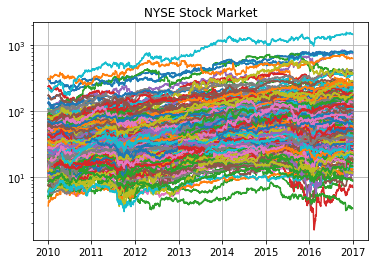

In [5]:
for company_name in get_all_companies(nyse_data):
        company_data = get_company_data(nyse_data, company_name)
        plot_company_date_vs_close(company_data)

plt.yscale('log')
plt.title('NYSE Stock Market')
plt.grid(True)

What is the overall trend? Looking at the mean.

- __Markus Amano__ I think we can use just the closing price of adjusted prices for data.

- __Markus Amano__ I think if we want useful data, we can equivocate companies if they correlate with eachother strongly.

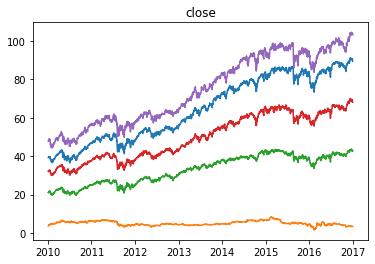

In [6]:
plot_stats(nyse_data, ["mean","min","25%","50%","75%"], ["close"])

Can companies be filtered out for similar variance?

In [32]:
def corr_mat(df, col:str):
    """Find the correlations between the col's of all companies in a df, Dataframe."""
    all_comp = np.random.choice(get_all_companies(nyse_data),50)
    
    correlation_matrix = {}#pandas.DataFrame(columns=all_comp)
    
    row = {comp:0.0 for comp in all_comp}
    
    for row_comp in all_comp:
        correlation_matrix[row_comp] = {}
        for col_comp in all_comp:
            correlation_matrix[row_comp][col_comp] = find_comp_corr(df,row_comp, col_comp,col)
            
    return pandas.DataFrame(correlation_matrix)

In [33]:
def find_comp_corr(df,comp_1, comp_2,col):
    """find_comp_corr finds the correlations of comp_1 and comp_2 for the column, col, in df, Dataframe."""
    date_indexed = df.set_index("date")
    
    comp_1_col = get_company_data(date_indexed,comp_1)[col]
    comp_2_col = get_company_data(date_indexed,comp_2)[col]
    return comp_1_col.corr(comp_2_col)

In [35]:
nyse_corr_mat = corr_mat(nyse_data, "close")

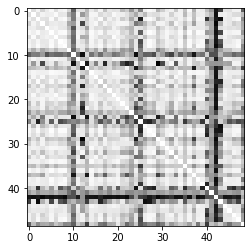

In [36]:
plt.imshow(nyse_corr_mat.values, cmap="gray")